In [88]:
import numpy as np
import matplotlib.pyplot as plt

h_g = np.linspace(0, 100000, 500)  # Geopotential height from 0 to 100000 m (100 km)

def AtmosphereFunction(h_g):
    
    r_e= 6.371e6                        #earth's radius in meters
    R=287                               #m^2/K-sec, a constant
    g0=9.81                             #m/sec^2, gravity
    T0=288.15                           #degree K
    g_hG = g0 * (r_e / (r_e + h_g))**2  #gravity acceleration based on geopotential height
    h = (r_e / (r_e + h_g)) * h_g      #altitude from geopotenential altitude
    
    if h < 11000:                      #standard atmosphere math below the tropopause (m)
        h0 = 0                          #sea level altitude for comparison
        t0 = 288.15                     #sea level temperature for comparison in K
        P0 = 101325                     #sea level pressure for comparison in Pa
        rho0 = 1.225                    #sea level density for comparison in kg/m^3
        a1 = -6.5 * 10**(-3)                #temperature lapse rate in K/m
        T = T0 + a1 * (h - h0)          #temperature at altitude h
        P = P0 * (T / T0) ** (-g0 / (a1 * R))  #pressure from temperature
        rho = rho0 * (T / T0) ** (-(g0 / (a1 * R) + 1))  #density from temperature
    else:                               #standard atmosphere math above the tropopause (m)
        h0 = 11000                     #altitude at 11 km 
        P0 = 22632                  #pressure at 11 km in Pa
        rho0 = 3639 * 10**(-4)                #density at 11 km in kg/m^3
        T = 216.66                     #temperature is constant above 11 km
        P = P0 * np.exp(-g0 / (R * T) * (h - h0))  #pressure from temperature
        rho = rho0 * np.exp(-(g0 / (R * T) * (h - h0)))  #density from temperature
    
    mu0 = 1.7894e-5                    #viscosity at SL
    a = np.sqrt(1.4 * P/rho)           #speed of sound
    mu = mu0 * (T / T0) ** (1.5) * (T0 + 110.4) / (T + 110.4)  #viscosity from sutherland's formula
    return [h_g, h, T, P, rho, a, mu]

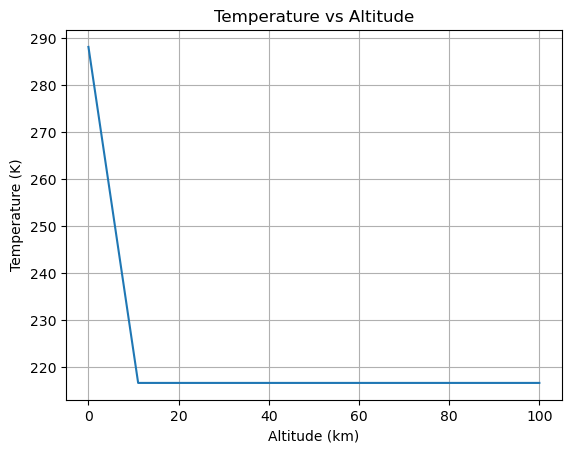

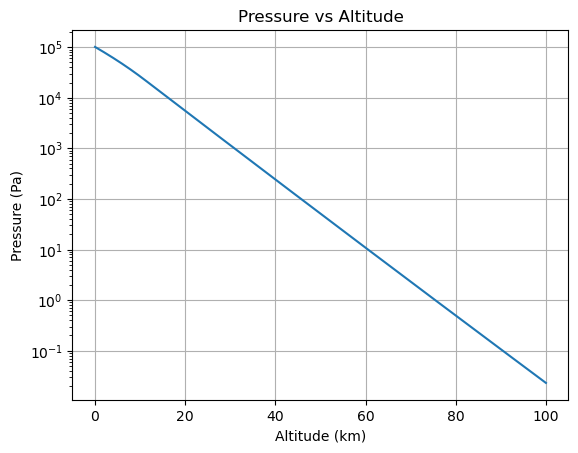

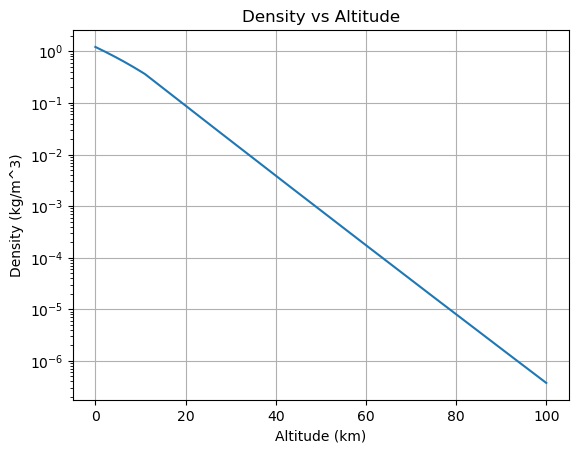

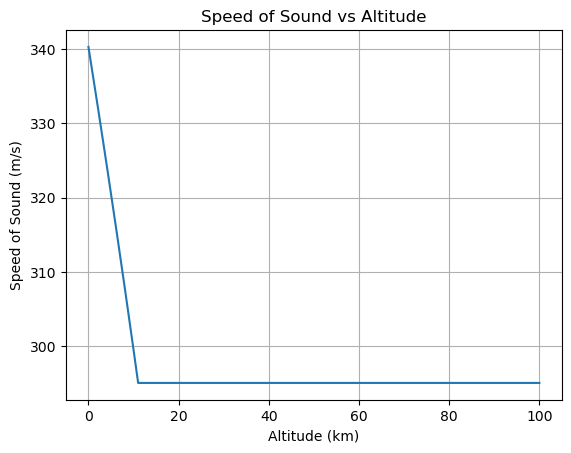

In [ ]:
#plot altitude function

#T vs Altitude plot
T = [AtmosphereFunction(h)[2] for h in h_g]
plt.figure()
plt.plot(h_g / 1000, T)
plt.title('Temperature vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Temperature (K)')
plt.grid()
plt.show()

#P vs Altitude plot
P = [AtmosphereFunction(h)[3] for h in h_g]
plt.figure()
plt.plot(h_g/ 1000, P)
plt.title('Pressure vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Pressure (Pa)')
plt.yscale('log')
plt.grid()

#rho vs Altitude plot
rho = [AtmosphereFunction(h)[4] for h in h_g]
plt.figure()
plt.plot(h_g / 1000, rho)
plt.title('Density vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Density (kg/m^3)')
plt.yscale('log')
plt.grid()
plt.show()

#a vs Altitude plot
a = [AtmosphereFunction(h)[5] for h in h_g]
plt.figure()
plt.plot(h_g / 1000, a)
plt.title('Speed of Sound vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Speed of Sound (m/s)')
plt.grid()
plt.show()